In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
import PIL 

img_height = 255
img_width = 255

Found 2146 files belonging to 3 classes.
Using 1932 files for training.
Found 2146 files belonging to 3 classes.
Using 214 files for validation.
(28, 256, 256, 1)
(28,)


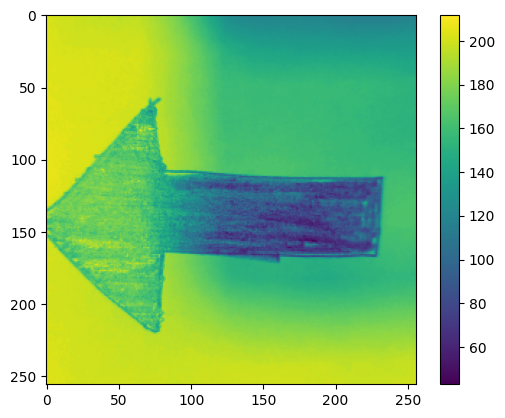

tf.Tensor(0, shape=(), dtype=int32)


In [12]:
ds_train= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="training",
    batch_size=28

    # image_size=(img_height,img_width)

)

ds_val= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="validation",
    # image_size=(img_height,img_width)
    batch_size=28
    
    
)



for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=15
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break



In [13]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    #image/=255
    return image,y

ds_train = ds_train.map(augment)

def aug1(x,y):
    return x/255,y

#ds_val = ds_val.map(aug1)



(28, 256, 256, 1)
(28,)


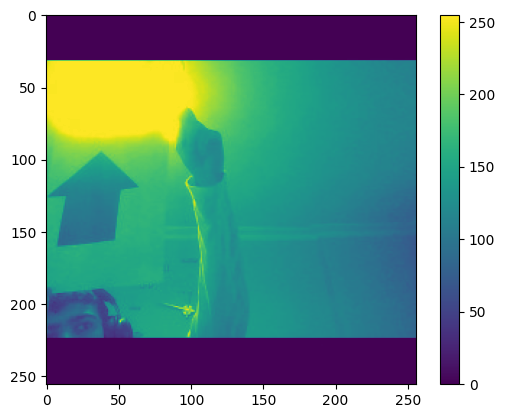

tf.Tensor(2, shape=(), dtype=int32)


In [15]:
for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=20
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break

In [ ]:
model = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(3)
])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(3,activation='sigmoid')
])

model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(ds_train,epochs=15)





In [ ]:
pred = model.predict(ds_val)


print(np.argmax(pred[1]))
plt.imshow([x for x,y in ds_val][0][1])
# print([y for x,y in ds_val][0][1])
plt.colorbar()
plt.grid(False)
plt.show()